# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [13]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [14]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [15]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [16]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [18]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

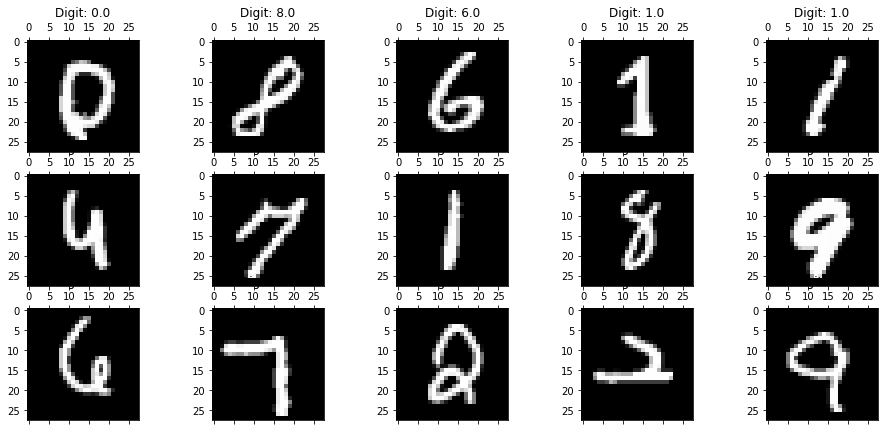

In [19]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(56000, 784)
(14000, 784)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)

In [23]:
pca_df = pd.DataFrame(X_pca)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-2.256248,3.030911,-2.548984,3.673323,-1.155234,-1.104310,2.966780,-4.094872,2.695482,1.187446,...,0.0,0.0,0.0,0.0,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
1,-0.436629,0.026966,-1.834615,6.297051,2.395753,5.018269,0.807950,-8.171125,-1.314046,0.299172,...,0.0,0.0,0.0,0.0,-2.045682e-15,-1.446553e-15,5.594767e-15,2.004916e-15,3.601288e-15,1.801540e-16
2,-5.199458,8.399829,-5.120282,-0.901494,1.058697,-0.964781,4.703598,4.639388,2.992282,1.084662,...,0.0,0.0,0.0,0.0,-3.872719e-16,3.856868e-15,2.974035e-15,1.369010e-15,1.373825e-15,-2.582961e-16
3,-7.124840,-1.491172,3.457120,2.087181,6.425926,-2.727636,2.857585,-2.014261,0.566451,-0.141504,...,0.0,0.0,0.0,0.0,-3.779328e-16,-4.614683e-15,-1.224886e-15,7.612962e-16,-2.562358e-15,-1.685395e-16
4,6.842040,-6.817439,-2.395315,2.585112,6.461059,-3.925389,3.984781,3.461088,-1.817503,2.324097,...,0.0,0.0,0.0,0.0,-5.947784e-15,-2.768340e-15,-3.638262e-15,2.077513e-15,1.123656e-15,1.251101e-16


In [30]:
result_pca = pd.DataFrame({'explained_variance':pca.explained_variance_,
                      'explained_variance_ratio':pca.explained_variance_ratio_})
result_pca['cum_sum_ratio'] = result_pca['explained_variance_ratio'].cumsum()

result_pca.head(100)
# 100번째 누적설명률 70%~80% 사이

,explained_variance,explained_variance_ratio,cum_sum_ratio
0,40.571062,0.056901,0.056901
1,29.097248,0.040809,0.097710
2,26.949058,0.037796,0.135506
3,20.793640,0.029163,0.164669
4,18.116091,0.025408,0.190077
...,...,...,...
95,1.823207,0.002557,0.700195
96,1.807505,0.002535,0.702730
97,1.784680,0.002503,0.705233
98,1.768741,0.002481,0.707713


In [34]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda_arr = lda.fit_transform(X_train, y_train.flatten())

lda_df = pd.DataFrame(lda_arr)

In [32]:
lda_df

,0,1,2,3,4,5,6,7,8
0,2.251262,-1.428906,1.632695,-1.241835,0.141800,-1.623287,2.432602,1.006086,0.463445
1,1.626296,-0.505584,2.351264,-2.050809,-0.938436,-3.579987,0.523016,1.332052,0.697567
2,3.905710,-1.987706,-1.175918,1.797121,-0.177912,1.103881,-0.419449,0.211750,1.174431
3,0.318569,3.436395,-0.795684,-0.629626,-2.278601,-0.234216,0.197919,0.192790,-0.511774
4,-3.098335,-1.804649,-1.865382,-0.522287,-1.792031,-0.490779,2.515291,-0.088135,1.203973
...,...,...,...,...,...,...,...,...,...
55995,-0.539971,-0.481211,-0.959103,-0.349818,1.287451,0.388365,-0.155747,0.009156,1.481716
55996,0.628523,3.902424,-0.462970,-1.182770,-1.465388,0.638920,-0.766978,-0.358221,-0.011266
55997,1.300319,-1.070323,1.753272,-2.236919,0.441103,-2.090954,0.040948,0.682082,0.827385
55998,-1.725135,2.466840,-1.954959,0.544336,2.471505,1.315534,0.617957,-0.287820,1.340910


In [33]:
result_lda = pd.DataFrame({'explained_variance_ratio':lda.explained_variance_ratio_})
result_lda['cum_sum_ratio'] = result_lda['explained_variance_ratio'].cumsum()
result_lda
# 4개 선택하면 70%에서 80% 사이

,explained_variance_ratio,cum_sum_ratio
0,0.237014,0.237014
1,0.202266,0.439280
2,0.178957,0.618236
3,0.106621,0.724858
4,0.094066,0.818923
5,0.068950,0.887874
6,0.050027,0.937901
7,0.034720,0.972621
8,0.027379,1.000000


In [36]:
lda = LDA(n_components=4)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))
X_test_lda = lda.transform(X_test)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [41]:
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import *
lr = LogisticRegression(random_state=0)

start = time.time()
#원본데이터
lr.fit(X_train, y_train)
end  = time.time()
pred = lr.predict(X_test)
print(accuracy_score(pred, y_test))
print(f'{end-start}')

C:\Users\lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9156428571428571
8.749360084533691


C:\Users\lee\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
lr = LogisticRegression(random_state=0)

start = time.time()
#pca
lr.fit(X_train_pca, y_train)
end  = time.time()
pred = lr.predict(X_test_pca)
print(accuracy_score(pred, y_test))
print(f'{end-start}')

C:\Users\lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9148571428571428
3.186861038208008


C:\Users\lee\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
lr = LogisticRegression(random_state=0)

start = time.time()
#lda
lr.fit(X_train_lda, y_train)
end  = time.time()
pred = lr.predict(X_test_lda)
print(accuracy_score(pred, y_test))
print(f'{end-start}')

C:\Users\lee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8172142857142857
1.3743700981140137


- 원본 데이터가 가장 학습 시간 오래 걸림
- pca는 성능 거의 유지되면서 학습 시간 50% 이상 감소
- lda는 학습 시간이 6배 이상 감소했으나 성능 저하가 있음

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier()
start = time.time()
#원본데이터
rf.fit(X_train, y_train)
end  = time.time()
pred = rf.predict(X_test)
print(accuracy_score(pred, y_test))
print(f'{end-start}')

C:\Users\lee\AppData\Local\Temp\ipykernel_9308\562590093.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.9711428571428572
22.420066118240356


In [46]:
rf = RandomForestClassifier()
start = time.time()
#pca
rf.fit(X_train_pca, y_train)
end  = time.time()
pred = rf.predict(X_test_pca)
print(accuracy_score(pred, y_test))
print(f'{end-start}')

C:\Users\lee\AppData\Local\Temp\ipykernel_9308\4243766909.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_pca, y_train)


0.9460714285714286
47.12571716308594


In [47]:
rf = RandomForestClassifier()
start = time.time()
#pca
rf.fit(X_train_lda, y_train)
end  = time.time()
pred = rf.predict(X_test_lda)
print(accuracy_score(pred, y_test))
print(f'{end-start}')

C:\Users\lee\AppData\Local\Temp\ipykernel_9308\3404871394.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_lda, y_train)


0.8237857142857142
10.13973617553711


- 원본데이터와 pca데이터를 비교했을 때, pca 데이터로 학습시킨 경우가 오히려 학습 시간이 늘어났고, 성능은 약 2.5% 저하됨
- 원본데이터와 lda데이터를 비교했을 때, lda 데이터로 학습시